In [2]:
import sys, os
sys.path.insert(1, os.path.join(sys.path[0], '..'))
import numpy as np
from plot_helpers import *
from src.util import *

# Ikeda-like System

## Relative Error Hopf Bifurcation

In [ ]:
from src.linear_stability import ode_find_hopf_point_bisec
from src.system import ikeda_ksf_jacobian
from src.util import spaced_ints

Ns = spaced_ints(10, 1000)
T_hopfs = np.array([ode_find_hopf_point_bisec(lambda T: ikeda_ksf_jacobian(N, T), 1, 2) for N in Ns])
np.savetxt("../data/ikeda_like/hopf_bifurcation.dat", [Ns, T_hopfs])

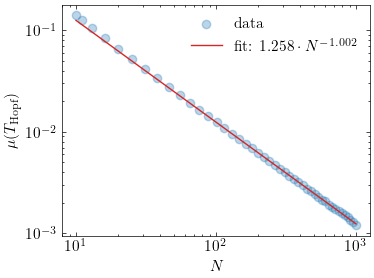

In [5]:
from src.system import ikeda_dde_T_hopf
from src.util import power_law
from scipy.optimize import curve_fit

Ns, T_hopfs = np.loadtxt("../data/ikeda_like/hopf_bifurcation.dat")
mus = np.abs(ikeda_dde_T_hopf() - T_hopfs) / ikeda_dde_T_hopf()
asymp_idx, = np.where(Ns > 300)
popt, pcov = curve_fit(power_law, Ns[asymp_idx], mus[asymp_idx], absolute_sigma=0)
fig, ax = plt.subplots(figsize=(4,3))
ax.set(
    xscale="log", yscale="log",
    xlabel=r'$N$', ylabel=r'$\mu(T_\text{Hopf})$',
    box_aspect=3/4
)
ax.plot(Ns, mus, color='tab:blue', linestyle='None', marker='o', alpha=.3, label='data')
ax.plot(
    Ns, power_law(Ns, *popt), color='tab:red',
    label=r'fit: $%.3f \cdot N^{-%.3f}$' % tuple(popt),
    # linewidth=3
)
ax.legend()
fig.savefig("../img/ikeda_like/rel_error_hopf", dpi=500)

## Attractor

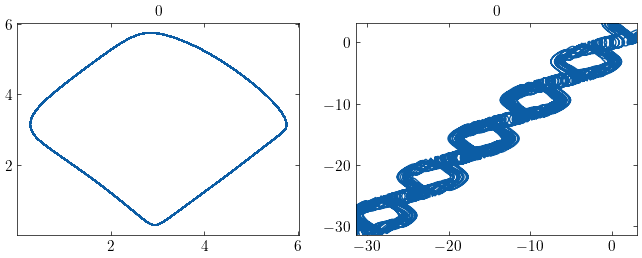

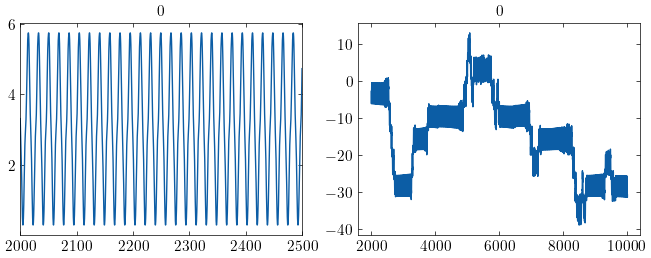

In [112]:
from src.solver import dde_solver, dde_constant_h0
from src.system import ikeda_dde_jitc
from src.util import x_over_xT

m = 100; t_max = 1e4

T = 4.5
ts1, traj1 = kill_transients(*dde_solver(ikeda_dde_jitc(T), T, m, t_max, h0=dde_constant_h0(m, 3)))
# ts1, traj1 = dde_solver(f(T), T, m, t_max, h0=dde_constant_h0(m, 3))
x01, xN1 = x_over_xT(traj1, m=m)
T = 5.1 # CHAOS
ts2, traj2 = kill_transients(*dde_solver(ikeda_dde_jitc(T), T, m, t_max, h0=dde_constant_h0(m, 3)))
# ts2, traj2 = dde_solver(f(T), T, m, t_max, h0=dde_constant_h0(m, 3))
x02, xN2 = x_over_xT(traj2, m=m)

fig, (axl, axr) = plt.subplots(figsize=(8,3), ncols=2)
# ax.set(xlim=(0, 2*np.pi), ylim=(0, 2*np.pi))
axl.set(
    box_aspect=3/4, title=r'%d'%0,
)
axr.set(
    box_aspect=3/4, title=r'%d'%0,
    xlim=(-10*np.pi, np.pi),
    ylim=(-10*np.pi, np.pi)
)
axl.plot(x01, xN1)
axr.plot(x02, xN2)

fig, (axl, axr) = plt.subplots(figsize=(8,3), ncols=2)
axl.set(box_aspect=3/4, title=r'%d'%0, xlim=(2000, 2500))
axr.set(box_aspect=3/4, title=r'%d'%0)
axl.plot(ts1, traj1)
axr.plot(ts2, traj2)

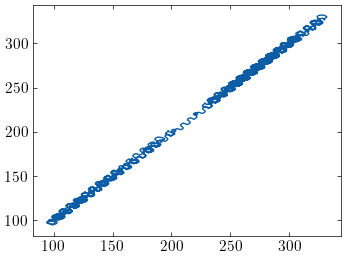

In [116]:
from src.solver import ode_solver
from src.system import ikeda_ksf_jitc
from src.util import x_over_xT, kill_transients

m = 100; t_max = 1e4
N = 50; T = 7
ts, traj = kill_transients(*ode_solver(ikeda_ksf_jitc(N, T), T, m, t_max, st0=np.ones(N+1)*3), tr_skip=0.3)
x0, xN = x_over_xT(traj)
fig, ax = plt.subplots(figsize=(4,3))
ax.set(
    box_aspect=3/4,
    # xlim=(-10*np.pi, np.pi),
    # ylim=(-10*np.pi, np.pi)
)
ax.plot(x0, xN)

## Period Doubling

In [53]:
from src.period_doubling import dde_find_pd_bisec
from src.system import ikeda_dde_jitc

dde_find_pd_bisec(ikeda_dde_jitc, 100, 1e4, 4.6, 4.93, tol=0.0005)

4.850601806640624

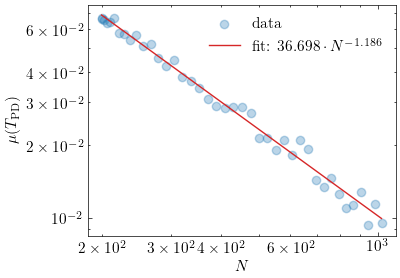

In [4]:
from scipy.optimize import curve_fit
from src.util import power_law

# ksf_T_pd = np.array([5.172607421875001, 5.171826171875001, 5.166748046875001, 5.1598046875, 5.1627441406250005, 5.174267578125001, 5.131213378906251, 5.12872314453125, 5.114095052083332, 5.126599121093751, 5.099133300781249, 5.102766927083332, 5.07108154296875, 5.055957031249999, 5.066764322916666, 5.036083984374999, 5.027880859375, 5.016357421875, 4.999951171875, 4.9905761718749995, 4.987744140625, 4.989892578125, 4.989240264892578, 4.981991068522135, 4.954457855224609, 4.953694915771484, 4.9429374694824215, 4.95190200805664, 4.939015960693359, 4.9523063659667965, 4.943753814697265, 4.920072174072265, 4.915853118896484, 4.92144546508789, 4.911481475830078, 4.903646087646484, 4.905233001708984, 4.912580108642578, 4.895894622802734, 4.906056976318359, 4.896566009521484])
# ksf_T_pd_old = np.array([5.172607421875001, 5.171826171875001, 5.166748046875001, 5.1598046875, 5.1627441406250005, 5.174267578125001, 5.131213378906251, 5.12872314453125, 5.114095052083332, 5.126599121093751, 5.099133300781249, 5.102766927083332, 5.07108154296875, 5.055957031249999, 5.066764322916666, 5.036083984374999, 5.027880859375, 5.016357421875, 4.999951171875, 4.9905761718749995, 4.987744140625, 4.989892578125, 4.989251708984375, 4.9819580078125, 4.954461669921875, 4.953668212890625, 4.942926025390625, 4.951898193359375, 4.939019775390625, 4.952325439453125, 4.943780517578125, 4.920098876953125, 4.915826416015625, 4.921441650390625, 4.911492919921875, 4.903619384765625, 4.905206298828125, 4.912591552734375, 4.895867919921875, 4.906060791015625, 4.896539306640625])
Ns, ksf_T_pd = np.loadtxt("../data/ikeda_like/ksf_period_doubling.dat")
dde_T_pd = 4.850601806640624
mu_T_pd = np.abs(ksf_T_pd - dde_T_pd) / dde_T_pd
asymp_idx, = np.where(Ns > 300)
popt, pcov = curve_fit(power_law, Ns[asymp_idx], mu_T_pd[asymp_idx], absolute_sigma=0)
fig, ax = plt.subplots()
ax.set(
    xlabel=r'$N$', ylabel=r'$\mu(T_\mathrm{PD})$',
    xscale="log", yscale="log",
    box_aspect=3/4,
    # xlim=(40, 1.1e3) , ylim=(5e-2, .8e-1)
)
ax.plot(Ns, mu_T_pd, color='tab:blue', linestyle='None', marker='o', alpha=.3, label='data')
ax.plot(
    Ns, power_law(Ns, *popt), color='tab:red',
    label=r'fit: $%.3f \cdot N^{-%.3f}$' % tuple(popt),
    # linewidth=3
)
ax.legend()
fig.savefig("../img/ikeda_like/rel_error_period_doubling", dpi=500)

## Diffusive Chaos

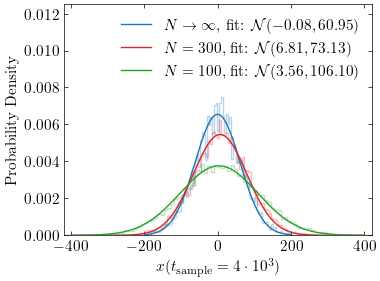

In [3]:
from src.util import gaussian
from scipy.optimize import curve_fit
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

# DDE
dde_final_positions = np.loadtxt("../data/ikeda_like/dde_final_positions.dat")
dde_p, dde_bins = np.histogram(dde_final_positions, density=True, bins=100)
dde_popt, _  = curve_fit(gaussian, dde_bins[:-1], dde_p, p0=(0, 100), absolute_sigma=0)
# N = 100
ksf_N100_final_positions = np.loadtxt("../data/ikeda_like/ksf_N100_final_positions.dat")
ksf_N100_p, ksf_N100_bins = np.histogram(ksf_N100_final_positions, density=True, bins=100)
ksf_N100_popt, _  = curve_fit(gaussian, ksf_N100_bins[:-1], ksf_N100_p, p0=(0, 100), absolute_sigma=0)
# N = 300
ksf_N300_final_positions = np.loadtxt("../data/ikeda_like/ksf_N300_final_positions.dat")
ksf_N300_p, ksf_N300_bins = np.histogram(ksf_N300_final_positions, density=True, bins=100)
ksf_N300_popt, _  = curve_fit(gaussian, ksf_N300_bins[:-1], ksf_N300_p, p0=(0, 100), absolute_sigma=0)

fig, ax = plt.subplots(figsize=(4,3))
ax.set(
    xlim=(-420, 420), ylim=(-0, 0.0125),
    box_aspect=3/4,
    xlabel=r"$x(t_\mathrm{sample} = 4\cdot 10^3)$", ylabel=r"Probability Density"
)
# ax.plot(dde_bins[:-1], dde_p)
# ax.plot(ksf_N100_bins[:-1], ksf_N100_p)
ax.stairs(dde_p, dde_bins, color="tab:blue", alpha=.3)
ax.plot(
    np.arange(-200, 200, 0.01), gaussian(np.arange(-200, 200, 0.01), *dde_popt), color='tab:blue',
    # label=r'fit: $\frac{1}{%(sig).1f \sqrt{2\pi}} \mathrm{e}^{-\left(\frac{x-%(mu).1f}{%(sig).1f \sqrt{2}}\right)^2}$' % {"mu": dde_popt[0], "sig": dde_popt[1]},
    label=r'$N \to\infty$, fit: $\mathcal{N}(%.2f, %.2f)$' % tuple(dde_popt)
)
ax.stairs(ksf_N300_p, ksf_N300_bins, color="tab:red", alpha=.3)
ax.plot(
    np.arange(-400, 400, 0.01), gaussian(np.arange(-400, 400, 0.01), *ksf_N300_popt), color='tab:red',
    # label=r'fit: $\frac{1}{%(sig).1f \sqrt{2\pi}} \mathrm{e}^{-\left(\frac{x-%(mu).1f}{%(sig).1f \sqrt{2}}\right)^2}$' % {"mu": ksf_N100_popt[0], "sig": ksf_N100_popt[1]},
    label=r'$N=300$, fit: $\mathcal{N}(%.2f, %.2f)$' % tuple(ksf_N300_popt)
)
ax.stairs(ksf_N100_p, ksf_N100_bins, color="tab:green", alpha=.3)
ax.plot(
    np.arange(-400, 400, 0.01), gaussian(np.arange(-400, 400, 0.01), *ksf_N100_popt), color='tab:green',
    # label=r'fit: $\frac{1}{%(sig).1f \sqrt{2\pi}} \mathrm{e}^{-\left(\frac{x-%(mu).1f}{%(sig).1f \sqrt{2}}\right)^2}$' % {"mu": ksf_N100_popt[0], "sig": ksf_N100_popt[1]},
    label=r'$N = 100$, fit: $ \mathcal{N}(%.2f, %.2f)$' % tuple(ksf_N100_popt)
)
ax.legend()
fig.savefig('../img/ikeda_like/diffusive_chaos', dpi=500)